# The Sparks Foundation

## TASK 1: Prediction using Supervised ML

### GRIPNOV2020

# Problem Statement

Predict the percentage of an student based on the no. of study hours,Here we have two columns "Hours" and "Scores".
Let's Start with the Reading and Understanding the data.

# Reading and Understanding Data

In [124]:
# import warnings
import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter("ignore")

In [125]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score

%matplotlib inline

In [126]:
df=pd.read_csv("https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv")
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [127]:
# chcking shape
df.shape

(25, 2)

In [128]:
# checkin columns
df.columns

Index(['Hours', 'Scores'], dtype='object')

In [129]:
# checking types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
Hours     25 non-null float64
Scores    25 non-null int64
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [130]:
# check for null values
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [131]:
# check for statistics
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


# EDA

### Pairplot

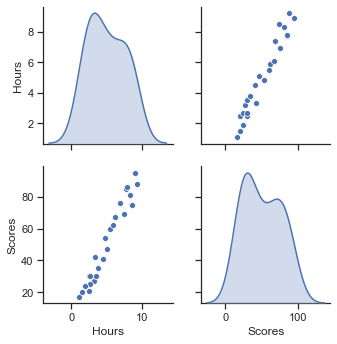

In [132]:
sns.set(style="ticks", color_codes=True)
sns.pairplot(df,diag_kind='kde')
plt.show()

### Heatmap

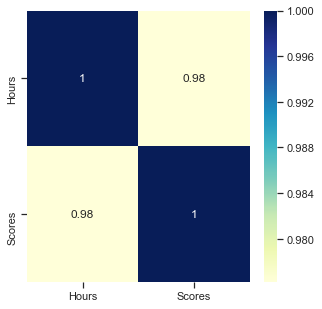

In [133]:
# Plotting heatmap
plt.figure(figsize=(5,5))
ax=sns.heatmap(df.corr(),annot=True,cmap='YlGnBu')
bottom,top=ax.get_ylim()
ax.set_ylim(bottom+0.5,top-0.5)
plt.show()

### Boxplot

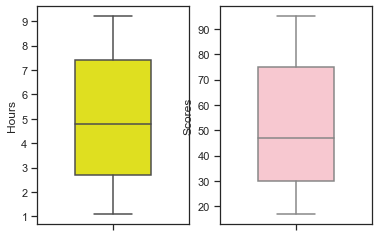

In [134]:
plt.subplot(1,2,1)
sns.boxplot(data=df,orient="v",x='Hours',color="yellow",width=0.5)
plt.subplot(1,2,2)
sns.boxplot(data=df,orient="v",x='Scores',color="Pink",width=0.5)
plt.show()

# Divide into X  and y

In [135]:
X = df["Hours"]
y = df["Scores"]

## Train Test Split

In [136]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 100)
print(X_train.shape)
print(X_test.shape)

(17,)
(8,)


# Model Building

In [137]:
# Add a constant to get an intercept
X_train_sm = sm.add_constant(X_train)

# Fit the resgression line using 'OLS'
lr = sm.OLS(y_train, X_train_sm).fit()
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Scores   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.954
Method:                 Least Squares   F-statistic:                     334.4
Date:                Mon, 09 Nov 2020   Prob (F-statistic):           1.15e-11
Time:                        00:05:17   Log-Likelihood:                -53.270
No. Observations:                  17   AIC:                             110.5
Df Residuals:                      15   BIC:                             112.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.4951      3.169      0.472      0.644      -5.260       8.250
Hours          9.8717      0.540     18.288      0.000       8.721      11.022
==============================================================================
Omnibus:                        4.576   Durbin-Watson:                   1.929
Prob(Omnibus):                  0.101   Jarque-Bera (JB):                1.488
Skew:                          -0.198   Prob(JB):                        0.475
Kurtosis:                       1.606   Cond. No.                         13.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [138]:
#  Print the parameters, i.e. the intercept and the slope of the regression line fitted
lr.params

const    1.495142
Hours    9.871714
dtype: float64

$ Scores = 1.495142 + 9.871714*Hours $

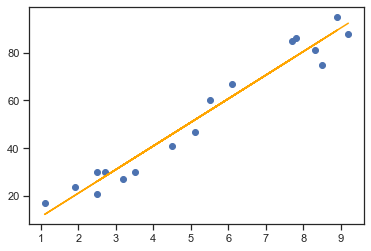

In [139]:
plt.scatter(X_train, y_train)
plt.plot(X_train, 1.495142 + 9.871714*X_train, 'orange')
plt.show()

In [140]:
y_train_pred = lr.predict(X_train_sm)
y_train_pred

6     92.314915
12    45.917857
4     36.046143
24    78.494515
0     26.174428
1     51.840886
20    28.148771
14    12.354028
17    20.251400
18    61.712600
2     33.084628
10    77.507343
16    26.174428
15    89.353401
7     55.789571
3     85.404715
8     83.430372
dtype: float64

# Predictions on the Test Set

In [ ]:
# Add a constant to X_test
X_test_sm = sm.add_constant(X_test)

# Predict the y values corresponding to X_test_sm
y_test_pred = lr.predict(X_test_sm)

In [ ]:
r2=r2_score(y_true=y_train,y_pred=y_train_pred)
print("Train r2 :",r2)
r2=r2_score(y_true=y_test,y_pred=y_test_pred)
print("Test r2 :",r2)

In [ ]:
plt.scatter(X_test, y_test)
plt.plot(X_test, 1.495142 + 9.871714*X_test, 'orange')
plt.show()

# Linear Regression using linear_model in sklearn

In [ ]:
X_train.shape

In [ ]:
X_train=X_train.values.reshape(-1,1)
X_test=X_test.values.reshape(-1,1)

In [ ]:
# Representing LinearRegression as lr(Creating LinearRegression Object)
lm = LinearRegression()

# Fit the model using lr.fit()
lm.fit(X_train, y_train)

In [ ]:
print(lm.intercept_)
print(lm.coef_)

### What will be predicted score if a student studies for 9.25 hrs/ day

In [ ]:
hours=9.25
hrs = sm.add_constant(pd.DataFrame({"Hours":[hours]}),has_constant="add")

# Predict the y values corresponding to X_test_sm
scores = lr.predict(hrs)
print(scores)

or we can put in eqution also after getting the equation for the best fit line.

So The Equation of our Best Fit line is 

$ 𝑆𝑐𝑜𝑟𝑒𝑠=1.495142+9.871714∗𝐻𝑜𝑢𝑟𝑠 $

In [ ]:
scores= 1.495142+9.871714*9.25
print(scores)

$ Thank  You  For  Reading :) $